## Algoritma SIR

1. initialize susceptible, transmission_constant, infected, recovery_rate, recovered, simulation_length, delta_t
2. numIteration := simulation_length/delta_t
3. change_in_recovered := recovery_rate*infected
4. change_in_susceptible := - transmission_constant x *susceptible* x infected
5. change_in_infected := - change_in_recovered - change_in_susceptible
6. for i from 0 through numIteration do the following :
        t := i*delta_t
        recovered := recovered + change_in_recovered*delta_t
        susceptible := susceptible + change_in_susceptible*delta_t
        infected := infected + change_in_infected*delta_t
        change_in_recovered := recovery_rate*infected
        change_in_susceptible := - transmission_constant x *susceptible* x infected
        change_in_infected := - change_in_recovered - change_in_susceptible
        display(t, recovered, susceptible, infected)
    end
7. Stop

,waktu,populasi_recovered,populasi_susceptible,populasi_infected
0,0.0,0.000000,762.000000,1.000000
1,0.1,0.050000,761.833884,1.116116
2,0.2,0.105806,761.648520,1.245675
3,0.3,0.168090,761.441689,1.390222
4,0.4,0.237601,761.210920,1.551480
...,...,...,...,...
136,13.6,705.300411,33.094707,24.604882
137,13.7,706.530655,32.917191,23.552154
138,13.8,707.708263,32.748182,22.543555
139,13.9,708.835441,32.587241,21.577318


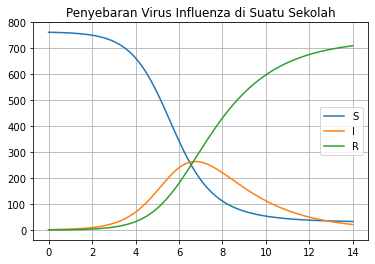

In [83]:
# Program
# diambil dari Equation Set 4.3.1 dari buku A.B Shiflet
import matplotlib.pyplot as plt
import pandas as pd

def SIR(simulation_length,delta_t):
    numIteration = int(simulation_length/delta_t)+1
    susceptible = 762
    transmission_constant = 0.00218
    infected = 1
    recovery_rate = 0.5
    recovered = 0
    
    change_in_recovered = recovery_rate*infected
    change_in_susceptible = - transmission_constant*susceptible*infected
    change_in_infected = - change_in_susceptible - change_in_recovered
    
    arr_t = [0 for i in range(numIteration)]
    arr_susceptible = [0 for i in range(numIteration)]
    arr_infected = [0 for i in range(numIteration)]
    arr_recovered = [0 for i in range(numIteration)]
    arr_t[0] = 0
    arr_susceptible[0] = susceptible
    arr_infected[0] = infected
    arr_recovered[0] = recovered
    
    for i in range(1,numIteration):
        t = i*delta_t
        arr_t[i] = t
        recovered = recovered + change_in_recovered*delta_t
        arr_recovered[i] = recovered
        susceptible = susceptible + change_in_susceptible*delta_t
        arr_susceptible[i] = susceptible
        infected = infected + change_in_infected*delta_t
        arr_infected[i] = infected
        
        change_in_recovered = recovery_rate*infected
        change_in_susceptible = - transmission_constant*susceptible*infected
        change_in_infected = - change_in_susceptible - change_in_recovered
        
    return(arr_t,arr_recovered,arr_susceptible,arr_infected)


df = pd.DataFrame(SIR(14,0.1))
df = df.transpose()
df = df.rename(columns={0:'waktu',1:'populasi_recovered',2:'populasi_susceptible',3:'populasi_infected'})
display(df)

plt.title("Penyebaran Virus Influenza di Suatu Sekolah")
plt.plot(df.waktu,df.populasi_susceptible,label = "S")
plt.plot(df.waktu,df.populasi_infected,label = "I")
plt.plot(df.waktu,df.populasi_recovered,label = "R")
plt.grid(True)
plt.legend()
plt.show()

## Algoritma SEIR

1. initialize susceptible, transmission_constant, infected, recovery_rate, recovered, simulation_length, delta_t, exposed
2. numIteration := simulation_length/delta_t
3. change_in_recovered := recovery_rate*infected
4. change_in_susceptible := - transmission_constant x *susceptible* x infected
5. change_in_exposed := - change_in_susceptible - change_in_infected
5. change_in_infected := change_in_exposed - change_in_recovered
6. for i from 0 through numIteration do the following :
        t := i*delta_t
        recovered := recovered + change_in_recovered*delta_t
        susceptible := susceptible + change_in_susceptible*delta_t
        infected := infected + change_in_infected*delta_t
        exposed := exposed + change_in_exposed*delta_t
        change_in_recovered := recovery_rate*infected
        change_in_susceptible := - transmission_constant x *susceptible* x infected
        change_in_exposed := - change_in_susceptible - change_in_infected
        change_in_infected := change_in_exposed - change_in_recovered
        display(t, recovered, susceptible, infected)
    end
7. Stop

,waktu,populasi_recovered,populasi_susceptible,populasi_exposed,populasi_infected
0,0.0,0.000000,762.000000,50.000000,1.000000
1,0.1,0.050000,761.833884,50.108058,1.058058
2,0.2,0.102903,761.658162,50.160961,1.180877
3,0.3,0.161947,761.462087,50.220005,1.317908
4,0.4,0.227842,761.243316,50.285900,1.470784
...,...,...,...,...,...
136,13.6,704.604596,33.196236,754.662654,25.141110
137,13.7,705.861652,33.014295,755.919710,24.065995
138,13.8,707.064951,32.841090,757.123009,23.035901
139,13.9,708.216747,32.676167,758.274805,22.049028


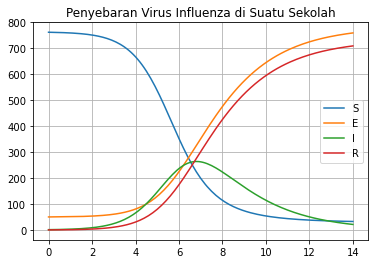

In [84]:
# Program
# diambil dari Equation Set 4.3.1 dari buku A.B Shiflet
import matplotlib.pyplot as plt
import pandas as pd

def SIR(simulation_length,delta_t):
    numIteration = int(simulation_length/delta_t)+1
    susceptible = 762
    transmission_constant = 0.00218
    infected = 1
    recovery_rate = 0.5
    recovered = 0
    exposed = 50
    
    change_in_recovered = recovery_rate*infected
    change_in_susceptible = - transmission_constant*susceptible*infected
    change_in_infected = (- change_in_susceptible - change_in_recovered)/2
    change_in_exposed = - change_in_susceptible - change_in_infected
    
    arr_t = [0 for i in range(numIteration)]
    arr_susceptible = [0 for i in range(numIteration)]
    arr_infected = [0 for i in range(numIteration)]
    arr_recovered = [0 for i in range(numIteration)]
    arr_exposed = [0 for i in range(numIteration)]
    arr_t[0] = 0
    arr_susceptible[0] = susceptible
    arr_infected[0] = infected
    arr_recovered[0] = recovered
    arr_exposed[0] = exposed
    
    for i in range(1,numIteration):
        t = i*delta_t
        arr_t[i] = t
        recovered = recovered + change_in_recovered*delta_t
        arr_recovered[i] = recovered
        susceptible = susceptible + change_in_susceptible*delta_t
        arr_susceptible[i] = susceptible
        infected = infected + change_in_infected*delta_t
        arr_infected[i] = infected
        exposed = exposed + change_in_exposed*delta_t
        arr_exposed[i] = exposed
        
        change_in_recovered = recovery_rate*infected
        change_in_susceptible = - transmission_constant*susceptible*infected
        change_in_infected = - change_in_susceptible - change_in_recovered
        change_in_exposed = - change_in_susceptible - change_in_infected
        
    return(arr_t,arr_recovered,arr_susceptible,arr_exposed,arr_infected)


df = pd.DataFrame(SIR(14,0.1))
df = df.transpose()
df = df.rename(columns={0:'waktu',1:'populasi_recovered',2:'populasi_susceptible',3:'populasi_exposed',4:'populasi_infected'})
display(df)

plt.title("Penyebaran Virus Influenza di Suatu Sekolah")
plt.plot(df.waktu,df.populasi_susceptible,label = "S")
plt.plot(df.waktu,df.populasi_exposed, label = "E")
plt.plot(df.waktu,df.populasi_infected,label = "I")
plt.plot(df.waktu,df.populasi_recovered,label = "R")
plt.grid(True)
plt.legend()
plt.show()

## Algoritma SARS (Diagram Lipsitch)

1. initialize b,k,m,p,q,u,v,w,susceptible,susceptible_quarantined, exposed, exposed_quarantined, infectious_undetected, infectious_quarantined, infectious_isolated, SARS_death,simulation_length, delta_t 
2. numIteration := simulation_length/delta_t
2. N0 := susceptible + exposed
3. sus_to_quar := (q*k*(1-b)*(infectious_undetectedxsusceptible)/N0
4. sus_to_expos := (1-q)*(k*b/N0)*(infectious_undetectedxsusceptible)
5. sus_to_expos_quar := q*(k*b/N0)*(infectious_undetectedxsusceptible)
6. expos_to_undet := p*exposed
6. quar_to_sus :=u*susceptible_quarantined
7. expos_quar_to_inf_quar := p*exposed_quarantined
8. undet_to_iso := w*infectious_undetected
9. undet_to_death := m*infectious_undetected
10. undet_to_im := v*infectious_undetected
11. inf_quar_to_iso := w*infectious_quarantined
12. quar_to_death := m*infectious_quarantined
13. iso_to_death := m*infectious_isolated
14. iso_to_immune := v*infectious_isolated
15. inf_quar_to_rec := v*infectious_quarantined
16. R := kxbx(1-q)/(v+m+w)
16. for i from 0 through numIteration do the following
        t := i*delta_t
        susceptible := susceptible + (quar_to_sus - sus_to_quar - sus_to_expos_quar - sus_to_expos)*delta_t
        susceptible_quarantined := susceptible_quarantined + (sus_to_quar - quar_to_sus)*delta_t
        exposed := exposed + (sus_to_expos - expos_to_undet)*delta_t
        exposed_quarantined := exposed_quarantined + (sus_to_expos_quar - expos_quar_to_inf_quar)*delta_t
        infectious_undetected := infectious_undetected + (expos_to_undet - undet_to_im - undet_to_iso - undet_to_death)*delta_t
        infectious_quarantined := infectious_quarantined + (expos_quar_to_inf_quar - inf_quar_to_iso - quar_to_death - inf_quar_to_rec)*delta_t
        infectious_isolated := infectious_isolated + (undet_to_iso + inf_quar_to_iso - iso_to_death - iso_to_immune)*delta_t
        SARS_death := SARS_death + (iso_to_death+quar_to_death+undet_to_death)*delta_t
        recovered_immune := recovered_immune + (undet_to_im + iso_to_immune + inf_quar_to_rec)*delta_t
        display (t,R, susceptible,susceptible_quarantined,exposed,exposed_quarantined,infectious_undetected,infectious_quarantined,infectious_isolated,SARS_death,recovered_immune
        

## Penjelasan konstanta
1. b = peluang bahwa kontak antara infectious_undetected (Iu) dan susceptible (S) mengakibatkan penularan SARS
2. k = banyaknya kontak per hari dari infectious_undetected (Iu), konstan tanpa memandang kepadatan populasi
3. m = laju kematian per kapita
4. N0 = populasi awal
5. p = rasio exposed yang kemudian dapat menularkan SARS per hari
6. q = rasio dari susceptible yang masuk ke karantina per hari, baik menjadi susceptible_quarantined maupun exposed_quarantined
7. u = rasio dari susceptible_quarantined yang diperbolehkan meninggalkan karantina per hari
8. v = laju kesembuhan per kapita
9. w = rasio dari infectious_undetected yang terdeteksi dan kemudian diisolasi


## Penjelasan Laju Perubahan Setiap Variabel

1. Laju Pertumbuhan Populasi susceptible_quarantined ($\frac{dSq}{dt}$)
    * sus_to_quar
        
        Diketahui q menyatakan rasio dari susceptible yang masuk ke karantina per hari, lalu fraksi jumlah kontak yang dilakukan oleh infectious_undetected adalah k/No dengan k adalah banyaknya kontak per hari dari infectious_undetected dan No adalah jumlah populasi awal (Susceptible + Exposed), kita ingat pada bagian SIR jumlah total kemungkinan interaksi antara susceptible dan infected adalah SI dengan S adalah populasi susceptible saat t-delta_t dan I adalah populasi infected saat t-delta_t. Untuk kasus ini, kita bisa nyatakan total kemungkinan interaksi antara susceptible dan infectious_undetected adalah S*Iu. Karena kita sedang mengamati perubahan populasi dari susceptible ke susceptible_quarantined maka kita melihat peluang bahwa tidak ada penularan SARS antara infectious_undetected dan susceptible adalah (1-b), dengan b adalah peluang kontak antara Iu dan S yg mengakibatkan penularan SARS. Maka kita bisa nyatakan laju perubahan sus_to_quar sebagai berikut:
        
        sus_to_quar := qk(1-b)(IuS)/No
        
    * quar_to_sus 
     
         Diketahui u adalah rasio dari susceptible_quarantined yang diperbolehkan meninggalkan karantina per hari, maka kita bisa nyataka laju perubahan quar_to_sus sebagai berikut:
         
         quar_to_sus := - uSq
   * Jadi kita bisa nyatakan $\frac{dSq}{dt}$ sebagai berikut:
   
   $\frac{dSq}{dt}$ = sus_to_quar - quar_to_sus = qk(1-b)(IuS)/No - uSq
     
     

Bilangan Reproduktif (R): 2.0999999999999996


,waktu,susceptible,susceptible_quarantined,exposed,exposed_quarantined,infectious_undetected,infectious_quarantined,infectious_isolated,SARS_death,recovered_immune
0,0.00,4.500000e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
1,0.25,4.500000e+06,0.000000,0.950000,0.000000,0.050000,0.000000,0.000000,0.000000e+00,0.000000
2,0.50,4.500000e+06,0.035250,0.907750,0.002250,0.095000,0.000000,0.000469,1.250000e-03,0.000781
3,0.75,4.500000e+06,0.101344,0.872337,0.006412,0.135637,0.000112,0.001340,3.636719e-03,0.002273
4,1.00,4.500000e+06,0.194435,0.842963,0.012196,0.172472,0.000427,0.002559,7.063977e-03,0.004415
...,...,...,...,...,...,...,...,...,...,...
796,199.00,1.773916e+06,878529.620547,59609.565345,25546.956577,65475.578556,28060.962238,24093.707460,1.012165e+06,632603.251791
797,199.25,1.773811e+06,874762.925214,59339.210828,25431.090355,65182.277896,27935.261955,23991.805665,1.015106e+06,634441.224420
798,199.50,1.773712e+06,871007.813730,59070.074362,25315.746155,64890.124543,27810.053375,23890.115496,1.018034e+06,636271.057943
799,199.75,1.773619e+06,867264.385821,58802.153028,25200.922726,64599.122033,27685.338014,23788.643722,1.020948e+06,638092.781278


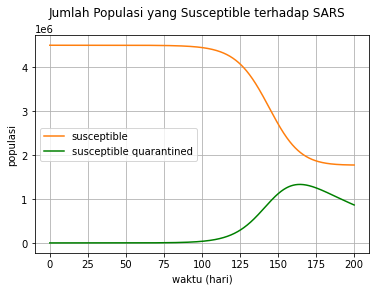

In [1]:
# Program
import matplotlib.pyplot as plt
import pandas as pd
# Subprogram
def SARS(simulation_length,delta_t):
    # inisiasi variabel
    numIteration = int(simulation_length/delta_t)+1
    susceptible = 4500000
    susceptible_quarantined = 0
    exposed = 1
    exposed_quarantined = 0
    infectious_undetected = 0
    infectious_isolated = 0
    infectious_quarantined = 0
    SARS_death = 0
    recovered_immune = 0
    
    # inisiasi konstanta
    b = 0.06
    k = 10
    m = 0.1
    N0 = susceptible+exposed
    p = 0.2
    q = 0.3
    u = 0.1
    v = 0.0625
    w = 0.0375
    
    # laju
    sus_to_quar = k*q*(1-b)*(infectious_undetected*susceptible)/N0
    sus_to_expos = (1-q)*(k*b/N0)*(infectious_undetected*susceptible)
    sus_to_expos_quar = q*(k*b/N0)*(infectious_undetected*susceptible)
    
    quar_to_sus = u*susceptible_quarantined
        
    expos_to_undet = p*exposed
    expos_quar_to_inf_quar = p*exposed_quarantined
                    
    undet_to_iso = w*infectious_undetected
    inf_quar_to_iso = w*infectious_quarantined
                    
    quar_to_death = m*infectious_quarantined
    undet_to_death = m*infectious_undetected
    iso_to_death = m*infectious_isolated
                    
    undet_to_im = v*infectious_undetected
    iso_to_immune = v*infectious_isolated
    inf_quar_to_rec = v*infectious_quarantined
                    
    R = k*b*(1-q)/(v+m+w)
    
    # inisiasi array
    arr_t = [0 for i in range(numIteration)]
    arr_susceptible = [0 for i in range(numIteration)]
    arr_susceptible_quarantined = [0 for i in range(numIteration)]
    arr_exposed = [0 for i in range(numIteration)]
    arr_exposed_quarantined = [0 for i in range(numIteration)]
    arr_infectious_undetected = [0 for i in range(numIteration)]
    arr_infectious_isolated = [0 for i in range(numIteration)]
    arr_infectious_quarantined = [0 for i in range(numIteration)]
    arr_SARS_death = [0 for i in range(numIteration)]
    arr_recovered_immune = [0 for i in range(numIteration)]
                   
    arr_t[0] = 0
    arr_susceptible[0] = susceptible
    arr_susceptible_quarantined[0] = susceptible_quarantined
    arr_exposed[0] = exposed
    arr_exposed_quarantined[0] = exposed_quarantined
    arr_infectious_undetected[0] = infectious_undetected
    arr_infectious_isolated[0] = infectious_isolated
    arr_infectious_quarantined[0] = infectious_quarantined
    arr_SARS_death[0] = SARS_death
    arr_recovered_immune[0] = recovered_immune
    
    # looping
    for i in range(1,numIteration):
        t = i*delta_t
        arr_t[i] = t
        
        susceptible = susceptible + (quar_to_sus - sus_to_quar - sus_to_expos_quar - sus_to_expos)*delta_t
        arr_susceptible[i] = susceptible
        
        susceptible_quarantined = susceptible_quarantined + (sus_to_quar - quar_to_sus)*delta_t
        arr_susceptible_quarantined[i] = susceptible_quarantined
        
        exposed = exposed + (sus_to_expos - expos_to_undet)*delta_t
        arr_exposed[i] = exposed
        
        exposed_quarantined = exposed_quarantined + (sus_to_expos_quar - expos_quar_to_inf_quar)*delta_t
        arr_exposed_quarantined[i] = exposed_quarantined
        
        infectious_undetected = infectious_undetected + (expos_to_undet - undet_to_im - undet_to_iso - undet_to_death)*delta_t
        arr_infectious_undetected[i] = infectious_undetected
        
        infectious_quarantined = infectious_quarantined + (expos_quar_to_inf_quar - inf_quar_to_iso - quar_to_death - inf_quar_to_rec)*delta_t
        arr_infectious_quarantined[i] = infectious_quarantined
        
        infectious_isolated = infectious_isolated + (undet_to_iso + inf_quar_to_iso - iso_to_death - iso_to_immune)*delta_t
        arr_infectious_isolated[i] = infectious_isolated
        
        SARS_death = SARS_death + (iso_to_death+quar_to_death+undet_to_death)*delta_t
        arr_SARS_death[i] = SARS_death
        
        recovered_immune = recovered_immune + (undet_to_im + iso_to_immune + inf_quar_to_rec)*delta_t
        arr_recovered_immune[i] = recovered_immune
        
        sus_to_quar = k*q*(1-b)*(infectious_undetected*susceptible)/N0
        sus_to_expos = (1-q)*(k*b/N0)*(infectious_undetected*susceptible)
        sus_to_expos_quar = q*(k*b/N0)*(infectious_undetected*susceptible)
    
        quar_to_sus = u*susceptible_quarantined
        
        expos_to_undet = p*exposed
        expos_quar_to_inf_quar = p*exposed_quarantined
                    
        undet_to_iso = w*infectious_undetected
        inf_quar_to_iso = w*infectious_quarantined
                    
        quar_to_death = m*infectious_quarantined
        undet_to_death = m*infectious_undetected
        iso_to_death = m*infectious_isolated
                    
        undet_to_im = v*infectious_undetected
        iso_to_immune = v*infectious_isolated
        inf_quar_to_rec = v*infectious_quarantined
        
    print("Bilangan Reproduktif (R):",R)
    return(arr_t,arr_susceptible,arr_susceptible_quarantined,arr_exposed,arr_exposed_quarantined,arr_infectious_undetected,arr_infectious_quarantined,arr_infectious_isolated,arr_SARS_death,arr_recovered_immune)

df = pd.DataFrame(SARS(200,0.25))
df = df.transpose()
df = df.rename(columns={0:'waktu',1:'susceptible',2:'susceptible_quarantined',3:'exposed',4:'exposed_quarantined',5:'infectious_undetected',6:'infectious_quarantined',7:'infectious_isolated',8:'SARS_death',9:'recovered_immune'})
display(df)

fig, (ax1) = plt.subplots(1)
fig.suptitle("Jumlah Populasi yang Susceptible terhadap SARS")

ax1.plot(df.waktu, df.susceptible,'tab:orange',label="susceptible")
ax1.plot(df.waktu,df.susceptible_quarantined,color="Green",label="susceptible quarantined")
ax1.legend()
ax1.set(xlabel = "waktu (hari)", ylabel = "populasi")
ax1.grid(True)


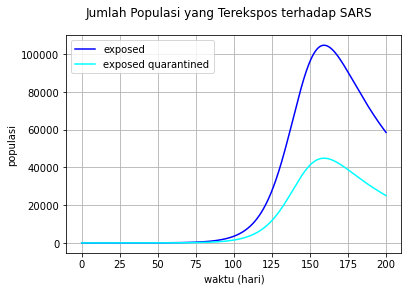

In [2]:
fig, (ax2) = plt.subplots(1)
fig.suptitle("Jumlah Populasi yang Terekspos terhadap SARS")

ax2.plot(df.waktu, df.exposed,color = 'Blue',label="exposed")
ax2.plot(df.waktu, df.exposed_quarantined, color = 'Cyan',label="exposed quarantined")
ax2.legend()
ax2.set(xlabel = "waktu (hari)", ylabel = "populasi")
ax2.grid(True)

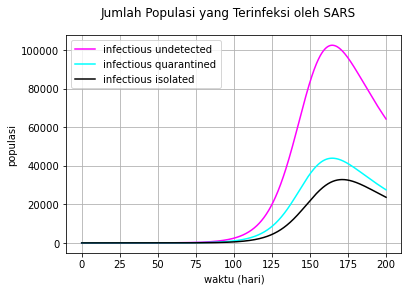

In [3]:
fig, (ax3) = plt.subplots(1)
fig.suptitle("Jumlah Populasi yang Terinfeksi oleh SARS")

ax3.plot(df.waktu, df.infectious_undetected,color = 'Magenta',label="infectious undetected")
ax3.plot(df.waktu, df.infectious_quarantined,color = 'Cyan',label="infectious quarantined")
ax3.plot(df.waktu, df.infectious_isolated,color = 'Black',label="infectious isolated")
ax3.legend()
ax3.set(xlabel = "waktu (hari)", ylabel = "populasi")
ax3.grid(True)

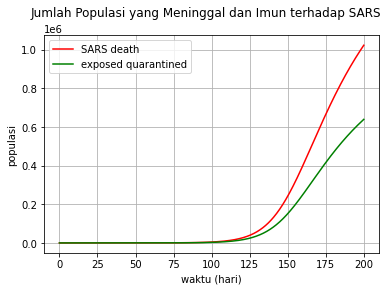

In [4]:
fig, (ax4) = plt.subplots(1)
fig.suptitle("Jumlah Populasi yang Meninggal dan Imun terhadap SARS")

ax4.plot(df.waktu, df.SARS_death,color = 'Red',label="SARS death")
ax4.plot(df.waktu, df.recovered_immune, color = 'Green',label="exposed quarantined")
ax4.legend()
ax4.set(xlabel = "waktu (hari)", ylabel = "populasi")
ax4.grid(True)

,waktu,populasi
0,0.0,100.000000
1,1.0,105.000000
2,2.0,106.931367
3,3.0,107.654946
4,4.0,107.922938
...,...,...
96,96.0,108.079351
97,97.0,108.079351
98,98.0,108.079351
99,99.0,108.079351


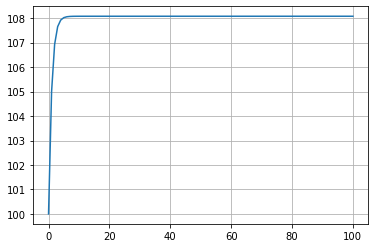

In [27]:
import math 
import matplotlib.pyplot as plt
import pandas as pd
from math import exp

def growth_population(simulationLength,delta_t):
    P = 100

    change = 0.05*(exp(0))*P
    numIteration = int(simulationLength/delta_t)+1

    arr_P = [0 for i in range(numIteration)]
    arr_t = [0 for i in range(numIteration)]
    arr_t[0] = 0
    arr_P[0] = P

    for i in range(1,numIteration):
        t = i*delta_t
        arr_t[i] = t
        P = P + change*delta_t
        change = 0.05*(exp(-i))*P
        arr_P[i] = P
    
    return(arr_t,arr_P)

df = pd.DataFrame(growth_population(100,1))
df = df.transpose()
df = df.rename(columns={0:'waktu',1:'populasi'})
display(df)


plt.plot(df.waktu,df.populasi)
plt.grid(True)
plt.show()